In [2]:
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [3]:
######### here are the weights for each source redshift to match COSMOS pz

zs_tng = array([0.034, 0.07 , 0.105, 0.142, 0.179, 0.216, 0.255, 0.294, 0.335,
       0.376, 0.418, 0.462, 0.506, 0.552, 0.599, 0.648, 0.698, 0.749,
       0.803, 0.858, 0.914, 0.973, 1.034, 1.097, 1.163, 1.231, 1.302,
       1.375, 1.452, 1.532, 1.615, 1.703, 1.794, 1.889, 1.989, 2.094,
       2.203, 2.319, 2.44 , 2.568])

weights = array([0.0025972 , 0.00282821, 0.00547208, 0.00394597, 0.0065455 ,
       0.00995475, 0.00816962, 0.01029778, 0.01376537, 0.01401739,
       0.01235127, 0.01561818, 0.01502547, 0.01662392, 0.02416116,
       0.02685403, 0.030863  , 0.03450561, 0.02412149, 0.03820889,
       0.04268923, 0.03597806, 0.02898686, 0.03332719, 0.0457648 ,
       0.03326885, 0.03681345, 0.02626132, 0.03751817, 0.02449252,
       0.02652501, 0.02184865, 0.02355912, 0.01751766, 0.02866484,
       0.0193798 , 0.01721197, 0.0184604 , 0.01650958, 0.14929563])

sum(weights)

1.0

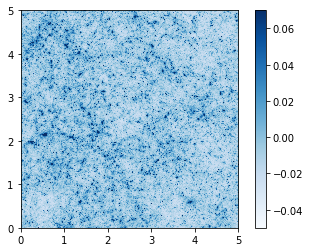

In [4]:
ng = 1024  # number of grids
theta = 5.0  # opening angle in deg

############ example code to open kappa map, from Ken

fname = "/global/cscratch1/sd/jialiu/kappaTNG/LP100/run100/kappa20.dat"

pix = theta/ng  # pixel size
theta = pix*np.arange(ng)


with open(fname, 'rb') as f:
    dummy = np.fromfile(f, dtype="int32", count=1)
    kappa = np.fromfile(f, dtype="float", count=ng*ng)
    dummy = np.fromfile(f, dtype="int32", count=1)

kappa = kappa.reshape((ng, ng))

imshow(kappa, vmin=-0.05, vmax=0.07, extent=[0,5,0,5],cmap="Blues")
colorbar()
show()

In [5]:
def kappa_gen(LP, run, iz):
    fname = "/global/cscratch1/sd/jialiu/kappaTNG/LP%03d/run%03d/kappa%02d.dat"%(LP, run, iz)

    with open(fname, 'rb') as f:
        dummy = np.fromfile(f, dtype="int32", count=1)
        kappa = np.fromfile(f, dtype="float", count=ng*ng)
        dummy = np.fromfile(f, dtype="int32", count=1)
    return kappa.reshape((ng, ng))
   

In [6]:
def cosmos_kappa_gen(LP, run):
    kappa_cosmos = np.zeros(shape=(ng, ng))
    for iz in range(1,41): ##### redshift counter
        kappa_cosmos += weights[iz-1]*kappa_gen(LP, run, iz)
    return kappa_cosmos

In [7]:
i=1
LP, run = 100, 100
test=cosmos_kappa_gen(LP, run)
kappa_maps = [kappa_gen(LP, run, iz) for iz in [12, 22, 35]] ## zs = [0.506, 1.034, 2.094]
kappa_maps.append(test)

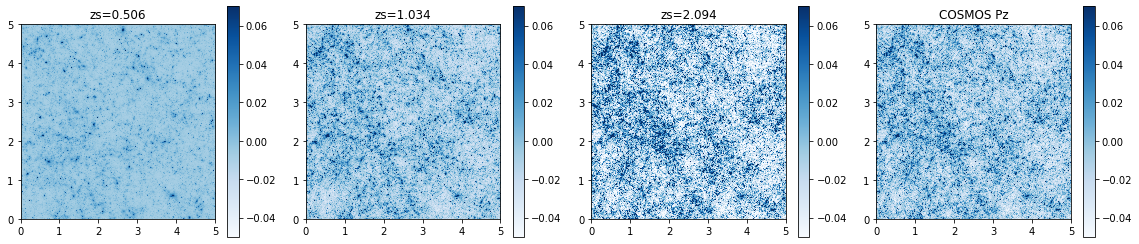

In [8]:
titles=['zs=%s'%(zs_tng[i]) for i in [12, 22, 35]] 
titles.append('COSMOS Pz')
figure(figsize=(16,3.5))
for i in range(4):
    subplot(1,4,i+1)
    imshow(kappa_maps[i], vmin=-0.05, vmax=0.07, extent=[0,5,0,5], cmap="Blues")
    title(titles[i])
    colorbar()
plt.tight_layout()

In [9]:
########### make directory for storing cosmos maps
os.system('mkdir /global/cscratch1/sd/jialiu/kappaTNG/COSMOS/') 

256

In [10]:
def mass_product (LP, run):
    fn = '/global/cscratch1/sd/jialiu/kappaTNG/COSMOS/kappa%i.npy' % ((LP-1)*100+run)
    if not os.path.isfile(fn):
        print (fn)
        kappa = cosmos_kappa_gen(LP, run)
        save(fn, kappa)
####### this is for MPI jobs, see  kappaTNG_COSMOS.py file for this part

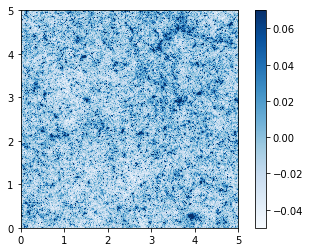

In [11]:
######### test one map from output file
test_map = np.load('/global/cscratch1/sd/jialiu/kappaTNG/COSMOS/kappa10.npy')
imshow(test_map, vmin=-0.05, vmax=0.07, extent=[0,5,0,5], cmap="Blues")
colorbar()